# EXOPLANETS

Exoplanets are planets that orbit stars other than our Sun. There are many different types of exoplanets, such as gas giants, rocky planets, and even potentially habitable planets. Exoplanets are discovered by observing the effects that their gravity has on the stars they orbit. Some of them are detected when they transit, or pass in front of, their host star, causing a slight decrease in the star's brightness. Exoplanets have been discovered around a wide variety of stars, including red dwarfs, yellow sun-like stars, and massive blue stars.

Here, I have used gaussian Naive bayes method.
I downloaded the data for exoplanets from NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu.



credits:https://www.google.com/url?sa=i&url=https%3A%2F%2Fprinsli.com%2Fwhat-is-exoplanet-definition-types-discovery-of-exoplanets-earth-like-exoplanets%2F&psig=AOvVaw2mHVuCNQcgcPJQCUdKLDDl&ust=1684425586705000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCJjElrjc_P4CFQAAAAAdAAAAABAJ

In [1]:
#importing the necessary libraries

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score#,plot_confusion_matrix

#function plot_confusion_matrix is depreceted in 1.0 and will be removed in 1.2. 
#Thetrefore using confusion_matrix_display instead
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns


In [2]:
#reading the csv file

import csv
data = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Naive bayes data.csv")
data
#max(data['pl_orbper'])
#min(data['pl_bmasse'])
#data['pl_bmasse']

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0       11 Com b    11 Com        2        1  Radial Velocity       2007   
1       11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2       14 And b    14 And        1        1  Radial Velocity       2008   
3       14 Her b    14 Her        1        2  Radial Velocity       2002   
4     16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   
...          ...       ...      ...      ...              ...        ...   
5317   ups And b   ups And        2        3  Radial Velocity       1996   
5318   ups And c   ups And        2        3  Radial Velocity       1999   
5319   ups And d   ups And        2        3  Radial Velocity       1999   
5320   ups Leo b   ups Leo        1        1  Radial Velocity       2021   
5321    xi Aql b    xi Aql        1        1  Radial Velocity       2007   

                               disc_facility  pl_controv_flag    pl_orbper  \
0                           Xinglong Station                0   326.030000   
1     Thueringer Landessternwarte Tautenburg                0   516.219970   
2          Okayama Astrophysical Observatory                0   185.840000   
3                     W. M. Keck Observatory                0  1765.038901   
4                     Multiple Observatories                0   798.500000   
...                                      ...              ...          ...   
5317                        Lick Observatory                0     4.617033   
5318                  Multiple Observatories                0   241.258000   
5319                  Multiple Observatories                0  1276.460000   
5320       Okayama Astrophysical Observatory                0   385.200000   
5321       Okayama Astrophysical Observatory                0   136.750000   

      pl_orbsmax  ...  st_metratio  st_logg         rastr          ra  \
0       1.290000  ...       [Fe/H]     2.31  12h20m42.91s  185.178779   
1       1.530000  ...       [Fe/H]     1.93  15h17m05.90s  229.274595   
2       0.830000  ...       [Fe/H]     2.63  23h31m17.80s  352.824150   
3       2.773069  ...       [Fe/H]     4.45  16h10m24.50s  242.602101   
4       1.660000  ...       [Fe/H]     4.36  19h41m51.75s  295.465642   
...          ...  ...          ...      ...           ...         ...   
5317    0.059222  ...        [M/H]     4.13  01h36m47.60s   24.198353   
5318    0.827774  ...        [M/H]     4.13  01h36m47.60s   24.198353   
5319    2.513290  ...        [M/H]     4.13  01h36m47.60s   24.198353   
5320    1.180000  ...       [Fe/H]     2.46  11h36m56.93s  174.237219   
5321    0.680000  ...       [Fe/H]     2.66  19h54m14.99s  298.562449   

             decstr        dec   sy_dist  sy_vmag  sy_kmag sy_gaiamag  
0     +17d47m35.71s  17.793252   93.1846  4.72307    2.282    4.44038  
1     +71d49m26.19s  71.823943  125.3210  5.01300    1.939    4.56216  
2     +39d14m09.01s  39.235837   75.4392  5.23133    2.331    4.91781  
3     +43d48m58.90s  43.816362   17.9323  6.61935    4.714    6.38300  
4     +50d31m00.57s  50.516824   21.1397  6.21500    4.651    6.06428  
...             ...        ...       ...      ...      ...        ...  
5317  +41d24m13.73s  41.403815   13.4054  4.09565    2.859    3.98687  
5318  +41d24m13.73s  41.403815   13.4054  4.09565    2.859    3.98687  
5319  +41d24m13.73s  41.403815   13.4054  4.09565    2.859    3.98687  
5320  -00d49m24.83s  -0.823564   52.5973  4.30490    2.184    4.03040  
5321  +08d27m39.98s   8.461105   56.1858  4.70964    2.171    4.42501  

[5322 rows x 34 columns]

This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu	

Description of each column

COLUMN pl_name:        Planet Name								
 COLUMN hostname:       Host Name								
 COLUMN sy_snum:        Number of Stars								
 COLUMN sy_pnum:        Number of Planets								
 COLUMN discoverymethod: Discovery Method								
 COLUMN disc_year:      Discovery Year								
 COLUMN disc_facility:  Discovery Facility								
 COLUMN pl_controv_flag: Controversial Flag								
 COLUMN pl_orbper:      Orbital Period [days]								
 COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])								
 COLUMN pl_rade:        Planet Radius [Earth Radius]								
 COLUMN pl_radj:        Planet Radius [Jupiter Radius]								
 COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]								
 COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]								
 COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance								
 COLUMN pl_orbeccen:    Eccentricity								
 COLUMN pl_insol:       Insolation Flux [Earth Flux]								
 COLUMN pl_eqt:         Equilibrium Temperature [K]								
 COLUMN ttv_flag:       Data show Transit Timing Variations								
 COLUMN st_spectype:    Spectral Type								
 COLUMN st_teff:        Stellar Effective Temperature [K]								
 COLUMN st_rad:         Stellar Radius [Solar Radius]							
 COLUMN st_mass:        Stellar Mass [Solar mass]								
 								


In [3]:
data1 = data[['pl_bmasse','pl_orbper', 'pl_eqt', 'pl_rade']].copy()
data1 = data1.dropna(inplace=False)        # remove rows with missing values
data1=data1.reset_index(drop=True)
data1

pl_bmasse     pl_orbper  pl_eqt  pl_rade
0      635.66000  11688.000000   700.0   13.400
1      263.97850     14.651600   700.0   13.900
2        7.99000      0.736547  1958.0    1.875
3     1664.46737   7520.000000  1400.0   12.800
4       20.12000      8.462999   593.0    4.070
...          ...           ...     ...      ...
3873     1.09000      4.656260   357.0    1.030
3874  3729.12221   8617.509520  1612.0   18.495
3875     3.63000      6.267908  1170.0    2.060
3876   332.10000     39.845800   614.0   13.800
3877    25.00000    102.540000   448.0    5.380

[3878 rows x 4 columns]

In [4]:
features = data1[['pl_bmasse', 'pl_orbper', 'pl_rade', 'pl_eqt']] # features
#features contains the input variables (mass, radius, temperature and orbital period) 


### Classification based on mass

In [93]:
Label = []
label = np.where(data1['pl_bmasse'] > 318, 1, 0)
data1['Label'] = label
data1

#label 1 = jupiter-like exoplanet
#label 0 = terrestrial exoplanet

pl_bmasse     pl_orbper  pl_eqt  pl_rade  Label
0      635.66000  11688.000000   700.0   13.400      1
1      263.97850     14.651600   700.0   13.900      0
2        7.99000      0.736547  1958.0    1.875      0
3     1664.46737   7520.000000  1400.0   12.800      1
4       20.12000      8.462999   593.0    4.070      0
...          ...           ...     ...      ...    ...
3873     1.09000      4.656260   357.0    1.030      0
3874  3729.12221   8617.509520  1612.0   18.495      1
3875     3.63000      6.267908  1170.0    2.060      0
3876   332.10000     39.845800   614.0   13.800      1
3877    25.00000    102.540000   448.0    5.380      0

[3878 rows x 5 columns]

In [94]:
#data1['planet_type'] = planet_types    #adding a column to the dataframe

count = data1['Label'].value_counts()
print(count)     # for original dataset

0    3532
1     346
Name: Label, dtype: int64


In [95]:
#Visualization to see the distribution between two labels in the original dataset:
plt.figure(figsize=(6,4))
colors = ["0", "1"]
sns.countplot('Label', data=data1, palette=colors)
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)



Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

In [96]:
# Split the data into training and testing sets
#using 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
#X_test

In [97]:
#sns.heatmap(X_train.isnull())

In [98]:
# counting labels in train dataset
a = np.array(y_train) 

unique, counts = np.unique(a, return_counts=True)

dict(zip(unique, counts))


{0: 2470, 1: 244}

In [99]:
# counting labels in test dataset
b = np.array(y_test) 

unique, counts = np.unique(b, return_counts=True)

dict(zip(unique, counts))


{0: 1062, 1: 102}

In [100]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
#y_train=y_train.reset_index(drop=True)
#y_test=y_test.reset_index(drop=True)

In [101]:
# Train the naive Bayes model using the training set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [102]:
# Test the model using the testing set
# predicting the planet_types using features of test set
y_pred = model.predict(X_test)
#y_pred
# counting labels in predicted values
c = np.array(y_pred) 
unique, counts = np.unique(c, return_counts=True)
dict(zip(unique, counts))


{0: 1133, 1: 31}

In [103]:
# Evaluate the accuracy of the model
#comparing the prediction and original values of planet_types in the test set to determine accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9338487972508591


In [104]:
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'pl_bmasse': [3.2], 'pl_orbper': [100], 'pl_rade':[45], 'pl_eqt':[1170]})
prediction = model.predict(new_data)
print('Prediction:', prediction[0])

Prediction: 0


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

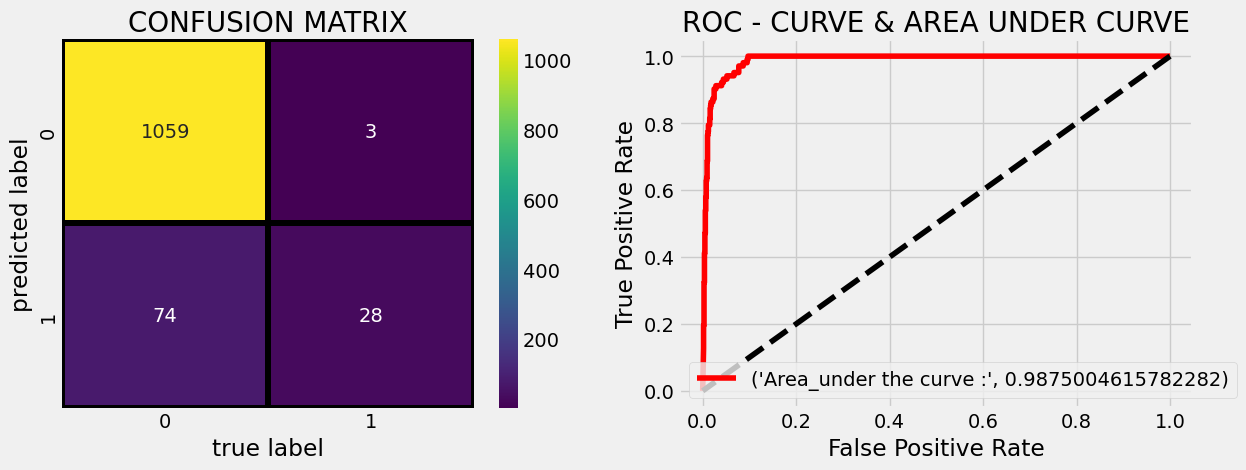

In [105]:
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label')

#ROC curve and Area under the curve plotting
predicting_probabilites = model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### Classification based on orbital period

In [106]:
Label2 = []
label2 = np.where(data1['pl_orbper'] > 365, 1, 0)
data1['Label2'] = label2
data1

# 1-jupiter-like
# 0-terrestrial

pl_bmasse     pl_orbper  pl_eqt  pl_rade  Label  Label2
0      635.66000  11688.000000   700.0   13.400      1       1
1      263.97850     14.651600   700.0   13.900      0       0
2        7.99000      0.736547  1958.0    1.875      0       0
3     1664.46737   7520.000000  1400.0   12.800      1       1
4       20.12000      8.462999   593.0    4.070      0       0
...          ...           ...     ...      ...    ...     ...
3873     1.09000      4.656260   357.0    1.030      0       0
3874  3729.12221   8617.509520  1612.0   18.495      1       1
3875     3.63000      6.267908  1170.0    2.060      0       0
3876   332.10000     39.845800   614.0   13.800      1       0
3877    25.00000    102.540000   448.0    5.380      0       0

[3878 rows x 6 columns]

In [107]:
count = data1['Label2'].value_counts()
print(count)     # for original dataset

0    3825
1      53
Name: Label2, dtype: int64


In [108]:
A_train, A_test, B_train, B_test = train_test_split(features, label2, test_size=0.3, random_state=42)
#A_test

In [109]:
# counting labels in train dataset
a = np.array(B_train) 

unique, counts = np.unique(a, return_counts=True)

dict(zip(unique, counts))


{0: 2678, 1: 36}

In [110]:
# counting labels in test dataset
b = np.array(B_test) 

unique, counts = np.unique(b, return_counts=True)

dict(zip(unique, counts))


{0: 1147, 1: 17}

In [111]:
A_train=A_train.reset_index(drop=True)
A_test=A_test.reset_index(drop=True)

In [112]:
# Train the naive Bayes model using the training set
model = GaussianNB()
model.fit(A_train, B_train)

GaussianNB()

In [113]:
# Test the model using the testing set
# predicting the planet_types using features of test set
B_pred = model.predict(A_test)
#B_pred
# counting labels in predicted values
c = np.array(B_pred) 
unique, counts = np.unique(c, return_counts=True)
dict(zip(unique, counts))

{0: 1152, 1: 12}

In [114]:
accuracy1 = accuracy_score(B_test, B_pred)
print('Accuracy:', accuracy1)

Accuracy: 0.9905498281786942


In [115]:
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(B_test,B_pred), annot=True, cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label')

#ROC curve and Area under the curve plotting
predicting_probabilites = model.predict_proba(A_test)[:,1]
fpr,tpr,thresholds = roc_curve(B_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

### Over-sampling the dataset since it is highly imbalanced

In [119]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_data1_A,ov_data1_B = model.fit_resample(data1.drop('Label2',axis=1), data1['Label2'])   
# .fit_sample() doesn't work if we import imblearn.over_sampling import SMOTE
print("After OverSampling, counts of label '1': {}".format(sum(ov_data1_B==1)))
print("After OverSampling, counts of label '0': {}".format(sum(ov_data1_B==0)))

ov_data1_B = ov_data1_B.astype('int')
#converting data type of a Series object to integer (int) to plot them.
#string values'0' and '1' that represent binary categories is being converted to integer for using in machine learning models

ov_data1_B.value_counts().reset_index().plot(kind='bar', x='index', y='Label2')


After OverSampling, counts of label '1': 3825
After OverSampling, counts of label '0': 3825


<AxesSubplot:xlabel='index'>

In [120]:
train_A, test_A, train_B, test_B = train_test_split(ov_data1_A, ov_data1_B, test_size=0.33, random_state=42)

Accuracy: 0.6697029702970297


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

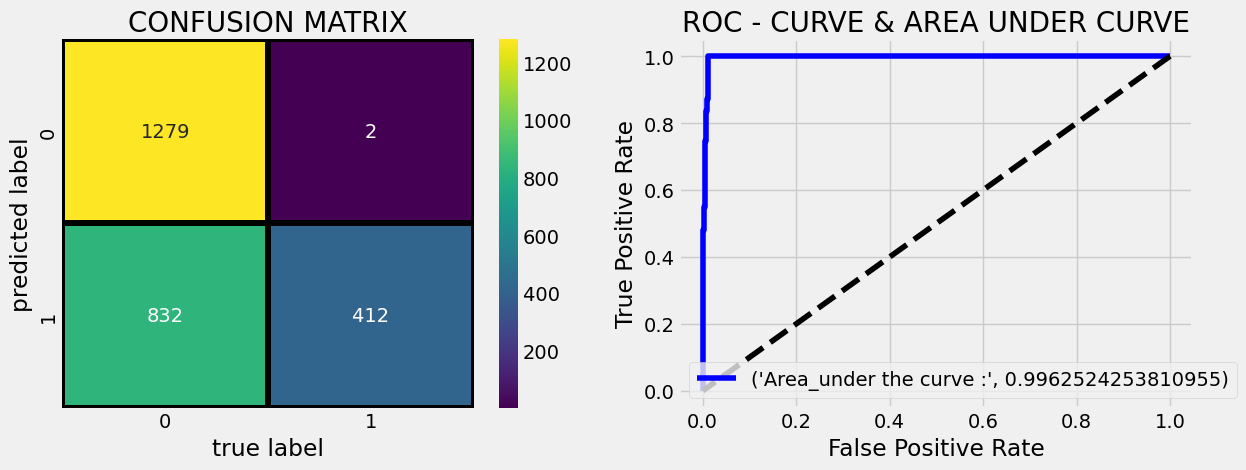

In [122]:
# Train the naive Bayes model using the training set
model = GaussianNB()
model.fit(train_A, train_B)
pred_B = model.predict(test_A)
accuracy2 = accuracy_score(test_B, pred_B)
print('Accuracy:', accuracy2)
#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_B,pred_B), annot=True, cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label')

#ROC curve and Area under the curve plotting
predicting_probabilites = model.predict_proba(test_A)[:,1]
fpr,tpr,thresholds = roc_curve(test_B,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "b")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)